In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pickle
import pandas as pd
from collections import defaultdict
import numpy as np

path_features = f"../ShapeDatabase_INFOMR_norm_features"
class_types = os.listdir(path_features)
class_types = [class_type for class_type in class_types if os.path.isdir(path_features + "/" + class_type) and class_type != ".git"]

feature_vectors = defaultdict(list)
errors = 0
for class_type in class_types:
    path_class_features = os.path.join(path_features, class_type)
    for obj_feature in os.listdir(path_class_features):
        if "normalized" in obj_feature:
            continue
        path = os.path.join(path_class_features, obj_feature)
        try:
            feature_vector = pickle.load(open(path, "rb"))
        except:
            errors+=1
            print(path)

        feature_vectors["obj_name"] += [feature_vector["obj_name"]]
        feature_vectors["class_type"] += [feature_vector["class_type"]]
        feature_vectors["feature_vector"] += [feature_vector["feature_vector"]]
        
        #### computation order
        # surface_area,
        # compactness,
        # rectangularity,
        # diameter,
        # convexity,
        # eccentricity,

        feature_vectors["surface_area"] += [feature_vector["feature_vector"][0]]
        feature_vectors["compactness"] += [feature_vector["feature_vector"][1]]
        feature_vectors["rectangularity"] += [feature_vector["feature_vector"][2]]
        feature_vectors["diameter"] += [feature_vector["feature_vector"][3]]
        feature_vectors["convexity"] += [feature_vector["feature_vector"][4]]
        feature_vectors["eccentricity"] += [feature_vector["feature_vector"][5]]
        for shape_prop, values in feature_vector["unbinned_shape_property"].items():
            feature_vectors[shape_prop] += [values]


In [2]:
df_features = pd.DataFrame(feature_vectors)
df_features.head()

,obj_name,class_type,feature_vector,surface_area,compactness,rectangularity,diameter,convexity,eccentricity,d1,d1_unbinned,d2,d2_unbinned,d3,d3_unbinned,d4,d4_unbinned,a3,a3_unbinned
0,D00415,House,"[8.731655162918516, 0.009779950803794511, 0.43...",8.731655,0.009780,0.434120,1.206584,0.789518,3.273353,"[19, 43, 67, 59, 46, 66, 64, 74, 65, 65, 87, 7...","[0.3790826689962797, 0.28313509409363036, 0.48...","[15, 36, 28, 47, 67, 58, 80, 96, 94, 108, 99, ...","[0.6291522572748914, 0.6418836251123654, 0.628...","[3, 5, 10, 24, 16, 32, 44, 59, 57, 61, 70, 84,...","[0.2627643929494432, 0.3168070299365996, 0.105...","[6, 4, 11, 29, 49, 44, 52, 88, 102, 113, 141, ...","[0.2282331046590914, 0.13777935260128063, 0.22...","[61, 118, 123, 130, 152, 182, 227, 218, 245, 2...","[0.20507158640473236, 0.9977629290810057, 1.03..."
1,m456,House,"[1.1509449865996604, 0.2191823965911976, 0.147...",1.150945,0.219182,0.147010,1.007970,0.569803,6.435659,"[18, 51, 94, 108, 213, 131, 220, 175, 245, 240...","[0.1415155998653676, 0.21650791735310812, 0.24...","[10, 48, 74, 92, 107, 131, 142, 169, 192, 194,...","[0.27172323482927513, 0.28339228898545926, 0.4...","[6, 3, 15, 30, 39, 46, 91, 68, 127, 117, 139, ...","[0.3157751737461834, 0.15386528214335599, 0.16...","[12, 7, 10, 46, 56, 87, 99, 135, 156, 197, 202...","[0.06218514373890898, 0.0892136993802847, 0.11...","[67, 121, 175, 204, 229, 252, 239, 300, 286, 3...","[0.27374211749446065, 0.922850849989713, 0.166..."
2,D00091,House,"[5.297333383893882, 0.060009099760645786, 0.60...",5.297333,0.060009,0.608628,1.182559,1.005269,15.525045,"[5, 10, 7, 17, 15, 59, 91, 76, 88, 94, 129, 10...","[0.2742921310795652, 0.43025834831272325, 0.42...","[6, 25, 44, 54, 63, 83, 101, 110, 120, 139, 17...","[0.43860059984617156, 0.35893487786571593, 0.4...","[8, 1, 5, 13, 18, 20, 48, 56, 72, 76, 92, 117,...","[0.058204672819718445, 0.26646648083937147, 0....","[12, 4, 17, 26, 55, 67, 101, 131, 161, 191, 20...","[0.10627239806695062, 0.0959684225027562, 0.08...","[106, 146, 203, 214, 278, 295, 317, 284, 277, ...","[2.3679769261986423, 2.9970447690788795, 0.849..."
3,m449,House,"[3.112646279216034, 0.11167390364905429, 0.432...",3.112646,0.111674,0.432111,1.027120,0.870656,2.348427,"[30, 39, 55, 42, 50, 55, 53, 45, 77, 66, 57, 1...","[0.3409156968701019, 0.3310612791167262, 0.414...","[8, 18, 22, 39, 43, 41, 48, 79, 60, 74, 83, 13...","[0.5270545183139911, 0.5005150301169223, 0.252...","[3, 5, 4, 10, 19, 27, 22, 27, 39, 45, 57, 67, ...","[0.03267123031053843, 0.3869612494444873, 0.27...","[200, 18, 33, 48, 35, 48, 45, 64, 61, 70, 74, ...","[0.17232082747943014, 0.1377598175401595, 0.16...","[54, 87, 113, 152, 137, 147, 155, 150, 189, 23...","[0.3448635517670147, 1.1057568438044885, 0.883..."
4,m434,House,"[5.227349671595888, 0.21445873310282226, 0.763...",5.227350,0.214459,0.763955,1.368974,1.058899,11.483944,"[105, 116, 150, 146, 196, 187, 225, 243, 241, ...","[0.1731042458860226, 0.2927387701198152, 0.241...","[20, 58, 84, 101, 119, 159, 172, 198, 207, 233...","[0.30174051090426696, 0.10254210779327168, 0.5...","[10, 13, 35, 43, 62, 91, 105, 136, 170, 162, 2...","[0.14896320292311513, 0.11635674937168569, 0.1...","[13, 16, 48, 77, 106, 132, 186, 153, 178, 261,...","[0.05292920705135242, 0.05435226730422204, 0.1...","[124, 206, 241, 265, 280, 263, 242, 263, 259, ...","[1.3008980075528156, 0.3867964112424689, 2.362..."


In [3]:
sns.set_theme(style="whitegrid")
def kde_shape_prop_plot(array_prop: np.ndarray, show_as_area = False, xlabel=""):
    for shape_val in array_prop:
        if show_as_area:
            sns.kdeplot(x=shape_val, legend=False, linewidth=0.8, fill=True, color=(0.15,0.15,0.15), alpha=0.45, edgecolor="white")
        else:
            sns.kdeplot(x=shape_val, legend=False, linewidth=0.8, color=(0.15,0.15,0.15))
    sns.despine()
    plt.xlabel(xlabel)
    plt.show()

In [4]:
sns.set_theme(style="whitegrid")
def kde_shape_prop_plot_combined(df: pd.DataFrame, show_as_area = False, xlabel="a3", class_to_represent="House", feature_to_represent="a3_unbinned", ax=None, show_plot=False, return_plot=False, save_plot=False):
    array_props = np.asarray(df[df["class_type"].isin([class_to_represent])][feature_to_represent].to_numpy()).T
    for shape_val in array_props:
        if show_as_area:
            plot = sns.kdeplot(x=shape_val, legend=False, linewidth=0.8, fill=True, color=(0.15,0.15,0.15), alpha=0.45, edgecolor="white", ax=ax)
        else:
            plot = sns.kdeplot(x=shape_val, legend=False, linewidth=0.8, color=(0.15,0.15,0.15), ax=ax)
    sns.despine()
    plt.xticks(size=12)
    plt.yticks(size=12)
    if ax:
        ax.set_ylabel(xlabel)
        ax.set_title(class_to_represent)
    else:
        plt.title(f"{xlabel} - {class_to_represent}", size=20)
        plt.ylabel("Density", size=15)
    if save_plot:
        plt.savefig(f"Plots/kde_plot_{xlabel}_{class_to_represent}", transparent=True)
    if show_plot:
        plt.show()
    if return_plot:
        return plot

def histogram_scalar_prop_plot(df: pd.DataFrame, xlabel="a3", class_to_represent="House", feature_to_represent="surface_area", ax=None, show_plot=False, bins=15, save_plot=False):
    array_props = np.asarray(df[df["class_type"].isin([class_to_represent])][feature_to_represent].to_numpy())
    plot = sns.histplot(array_props, bins=bins, ax=ax)
    sns.despine()
    if ax:
        ax.set_ylabel(xlabel)
        ax.set_title(class_to_represent)
    else:
        plt.xlabel(xlabel)
    if save_plot:
        plt.savefig(f"Plots/histogram_{xlabel}_{class_to_represent}", transparent=True)
    if show_plot:
        plt.show()
    return plot

In [5]:
# problematic features = compactness, rectangularity, volume (stuff), convexity

In [6]:
import vedo
from mesh_properties import surface_area, compactness, rectangularity, diameter, convexity, eccentricity
from MeshObject import MeshObject
cube, sphere, pyramid, cone, cylinder = vedo.Cube(), vedo.Sphere(r=1, res=30), vedo.Pyramid(), vedo.Cone(), vedo.Cylinder()
drum = MeshObject("../ShapeDatabase_INFOMR_norm/Drum/D00951.obj", name="drum", visualize=True)
house = MeshObject("../ShapeDatabase_INFOMR_norm/House/m452.obj", name="house", visualize=True)
jet = MeshObject("../ShapeDatabase_INFOMR_norm/Jet/m1298.obj", name="jet", visualize=True)
cube.triangulate()
pyramid.triangulate()
cone.triangulate()
cylinder.triangulate()

##### ECCENTRICITY OF SPHERE IS NOT 1 BECAUSE OF HOW MESH IS REPRESNTED - APPROX. OF A SPHERE
##### , VERY DENSE AT THE POLES (IE NOT UNIFORMLY DISTRIBUTED)

pltr = vedo.Plotter()
for shape in [cube, sphere, pyramid, cone, cylinder, drum, house, jet]:
    print(shape.name, end=" ")
    for operation in [surface_area,compactness,rectangularity,diameter,convexity,eccentricity]:
        print(operation.__name__, round(operation(shape),3), end=" ")
    print()

Cube surface_area 6.0 compactness 0.524 rectangularity 1.0 diameter 1.732 convexity 1.0 eccentricity 1.0 
Sphere surface_area 12.536 compactness 0.998 rectangularity 0.523 diameter 2.0 convexity 1.008 eccentricity 1.867 
Pyramid surface_area 5.464 compactness 0.308 rectangularity 0.167 diameter 2.0 convexity 1.0 eccentricity 2.5 
Cone surface_area 13.058 compactness 0.498 rectangularity 0.261 diameter 3.162 convexity 1.0 eccentricity 2.722 
Cylinder surface_area 18.742 compactness 0.663 rectangularity 0.776 diameter 2.828 convexity 1.0 eccentricity 2.0 
drum surface_area 3.254 compactness 0.129 rectangularity 0.231 diameter 1.141 convexity 0.44 eccentricity 7.034 
house surface_area 9.297 compactness 0.001 rectangularity 0.131 diameter 1.215 convexity 0.193 eccentricity 3.254 
jet surface_area 0.885 compactness 0.027 rectangularity 0.059 diameter 1.041 convexity 0.211 eccentricity 24.464 


In [7]:
house.show()

In [8]:
df_features.iloc[df_features["compactness"].argmax()]

obj_name                                                      m1344
class_type                                          AircraftBuoyant
feature_vector    [1.5593655064432361, 0.8470380878605316, 0.358...
surface_area                                               1.559366
compactness                                                0.847038
rectangularity                                             0.358645
diameter                                                   1.002641
convexity                                                  0.917583
eccentricity                                               2.236126
d1                [1044, 608, 649, 582, 702, 629, 1075, 1553, 15...
d1_unbinned       [0.34641939485292667, 0.3531128150838734, 0.34...
d2                [9, 26, 19, 58, 62, 58, 65, 52, 72, 51, 80, 83...
d2_unbinned       [0.5622844489850243, 0.19977019434465668, 0.80...
d3                [4, 2, 0, 7, 13, 21, 17, 22, 36, 36, 50, 58, 7...
d3_unbinned       [0.19171788211520918, 0.217858

In [9]:
df_features[df_features["class_type"] == "Monoplane"].iloc[df_features[df_features["class_type"] == "Monoplane"]["eccentricity"].argmax()]

obj_name                                                     D00167
class_type                                                Monoplane
feature_vector    [0.1648312988487246, 0.008061176291028434, 0.0...
surface_area                                               0.164831
compactness                                                0.008061
rectangularity                                             0.018529
diameter                                                    1.00019
convexity                                                   0.09467
eccentricity                                             142.740315
d1                [349, 283, 116, 232, 146, 58, 188, 127, 256, 1...
d1_unbinned       [0.09692745314979852, 0.09880931837753057, 0.0...
d2                [87, 205, 360, 305, 299, 319, 259, 253, 231, 2...
d2_unbinned       [0.16281249253157146, 0.2206804692184434, 0.22...
d3                [8, 28, 76, 127, 149, 228, 268, 361, 384, 421,...
d3_unbinned       [0.1309606070148391, 0.1539518

In [16]:
global_features = ["surface_area", "compactness", "rectangularity", "diameter", "convexity", "eccentricity"]

classes = list(df_features["class_type"].unique())
for idx in range(0,len(classes)):
    fig, axes = plt.subplots(6,4, figsize=(16,9))
    subset_classes = classes[idx*4:(idx+1)*4]
    if len(subset_classes) < 4:
        subset_classes = classes[-4:]

    for row_axes, feature in zip(axes, global_features):
        histogram_scalar_prop_plot(df_features, xlabel=feature, class_to_represent=subset_classes[0], feature_to_represent=feature, bins=15, save_plot=False, ax=row_axes[0])
        histogram_scalar_prop_plot(df_features, xlabel=feature, class_to_represent=subset_classes[1], feature_to_represent=feature, bins=15, save_plot=False, ax=row_axes[1])
        histogram_scalar_prop_plot(df_features, xlabel=feature, class_to_represent=subset_classes[2], feature_to_represent=feature, bins=15, save_plot=False, ax=row_axes[2])
        histogram_scalar_prop_plot(df_features, xlabel=feature, class_to_represent=subset_classes[3], feature_to_represent=feature, bins=15, save_plot=False, ax=row_axes[3])
        [ax.set_ylabel("") for ax in row_axes[1:]]

    plt.tight_layout()
    plt.savefig(f"Plots/multiple_plot_global_features_{''.join(subset_classes)}.png", transparent=True, bbox_inches="tight")
    plt.close()
    # plt.show()

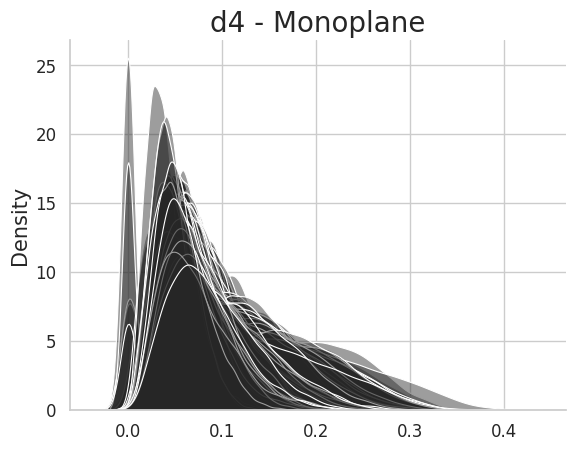

In [11]:
feature = "d4"
_ = kde_shape_prop_plot_combined(df_features, show_as_area=True, xlabel=feature, class_to_represent="Humanoid", feature_to_represent=f"{feature}_unbinned", show_plot=False)
_ = kde_shape_prop_plot_combined(df_features, show_as_area=True, xlabel=feature, class_to_represent="House", feature_to_represent=f"{feature}_unbinned", show_plot=False)
_ = kde_shape_prop_plot_combined(df_features, show_as_area=True, xlabel=feature, class_to_represent="Biplane", feature_to_represent=f"{feature}_unbinned", show_plot=False)
_ = kde_shape_prop_plot_combined(df_features, show_as_area=True, xlabel=feature, class_to_represent="Monoplane", feature_to_represent=f"{feature}_unbinned", show_plot=False)

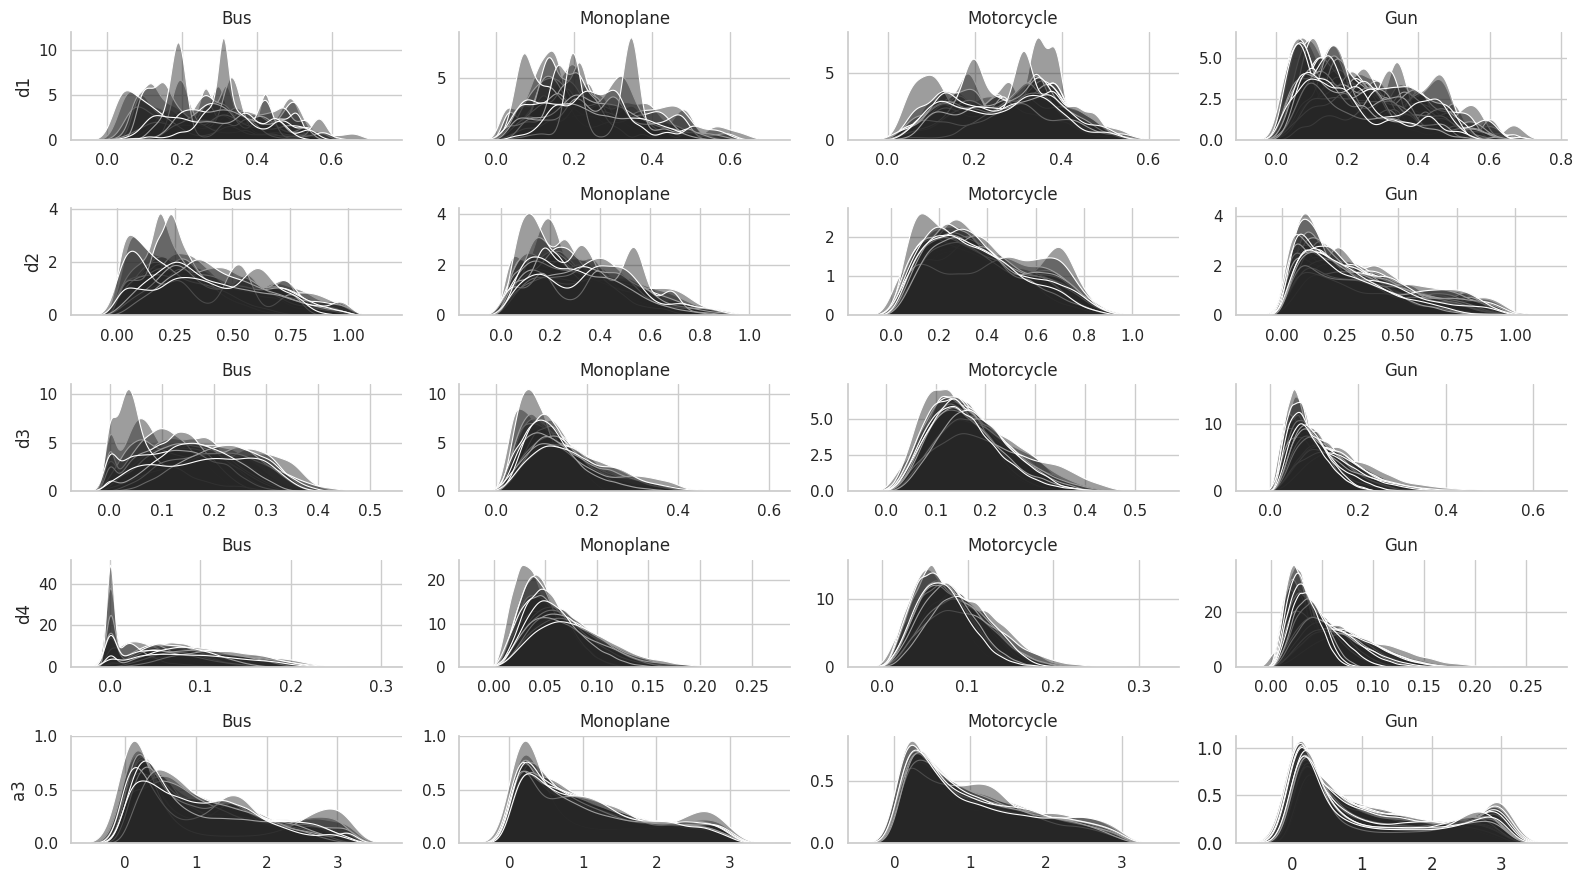

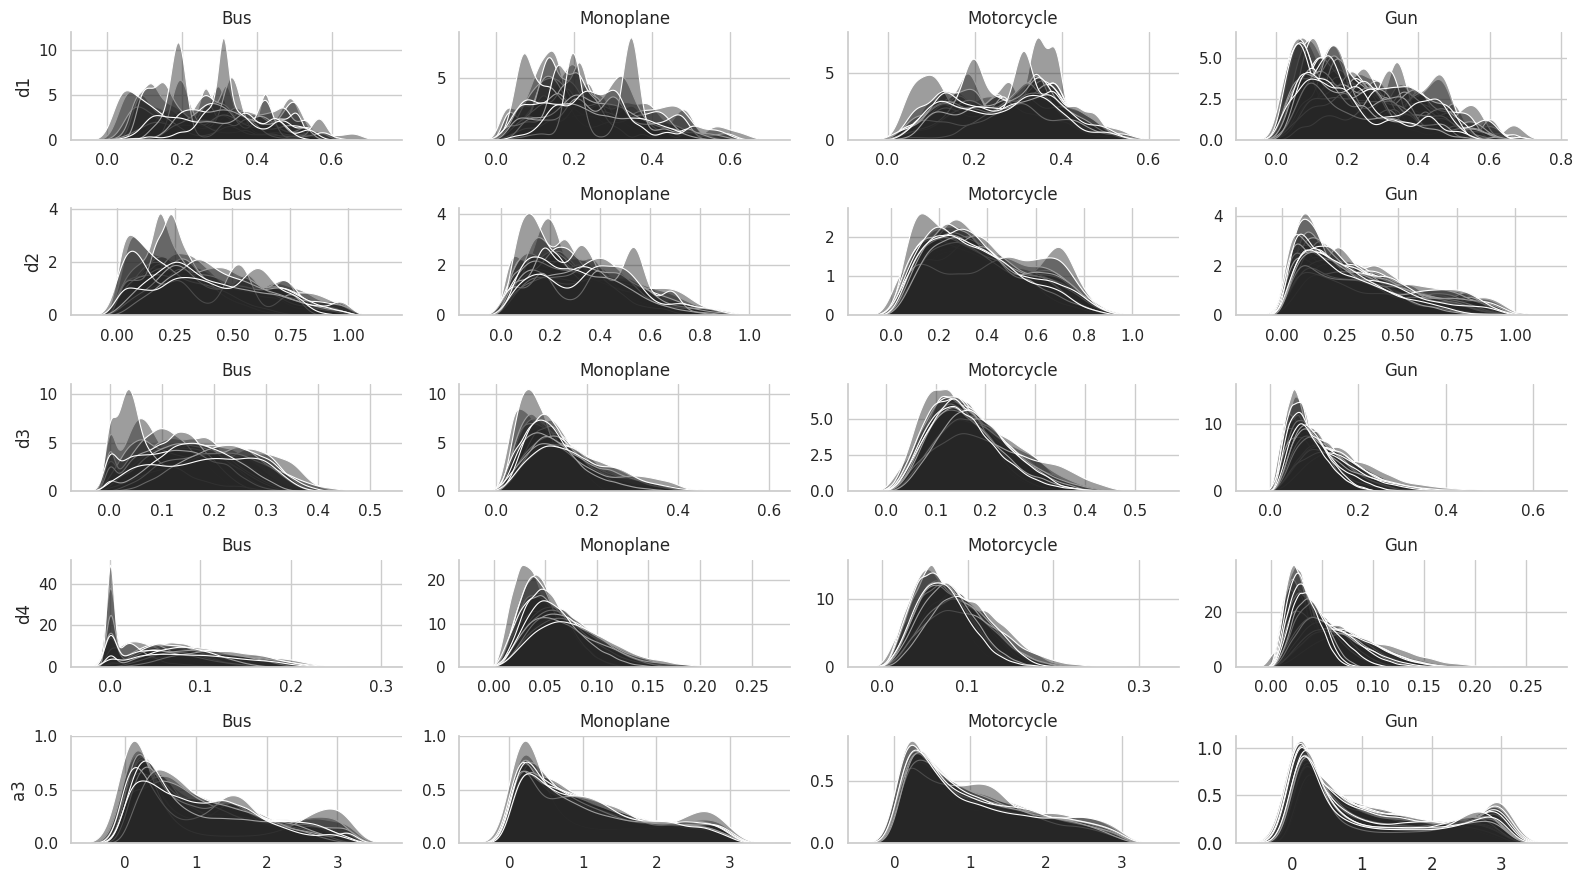

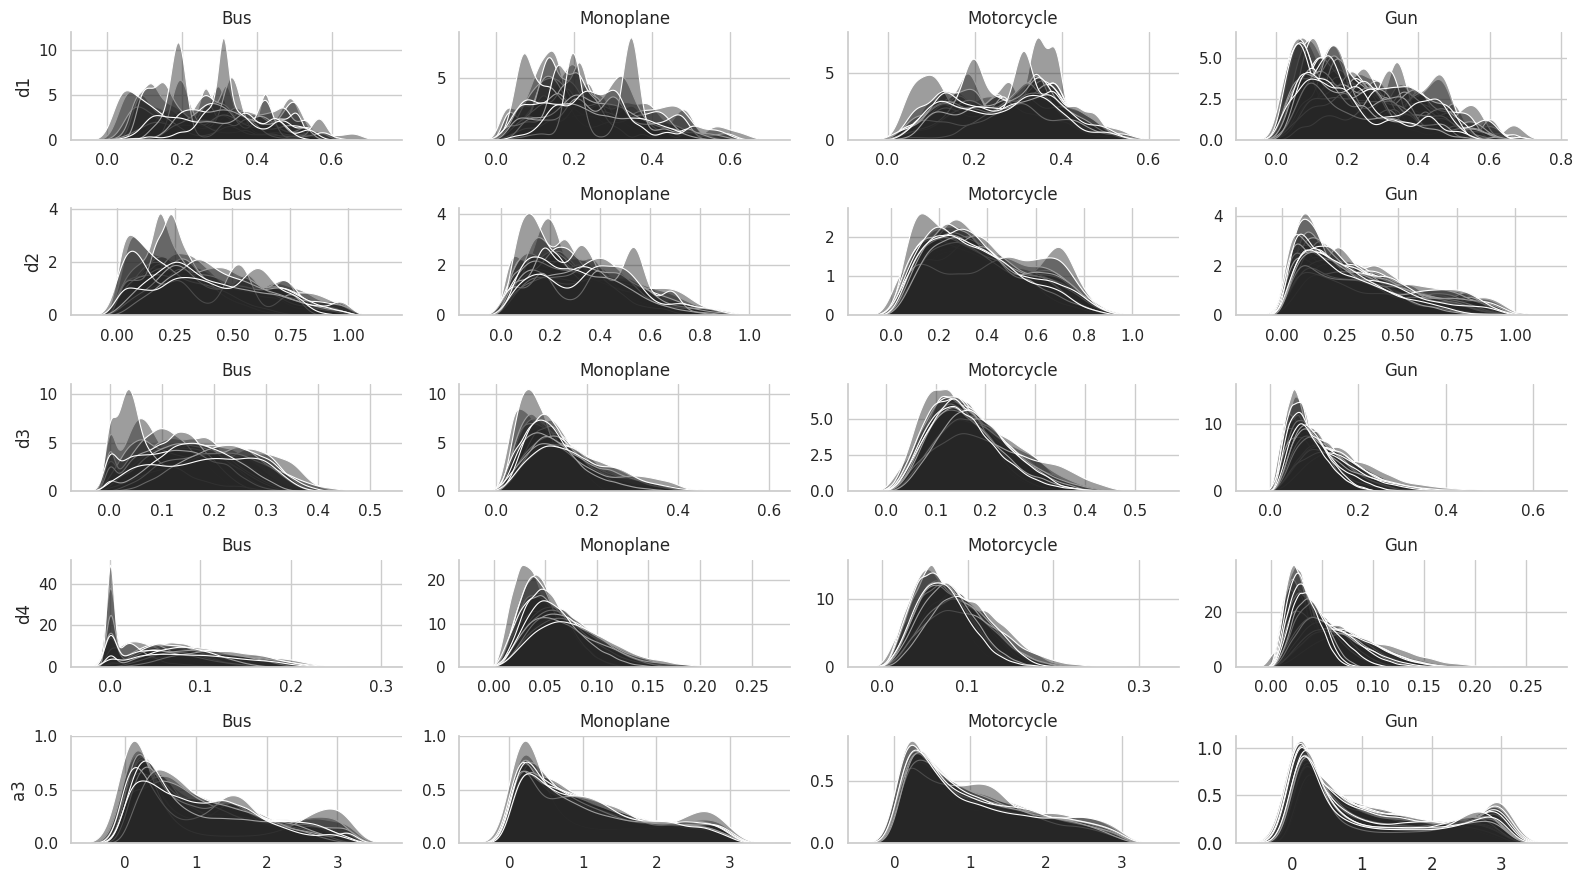

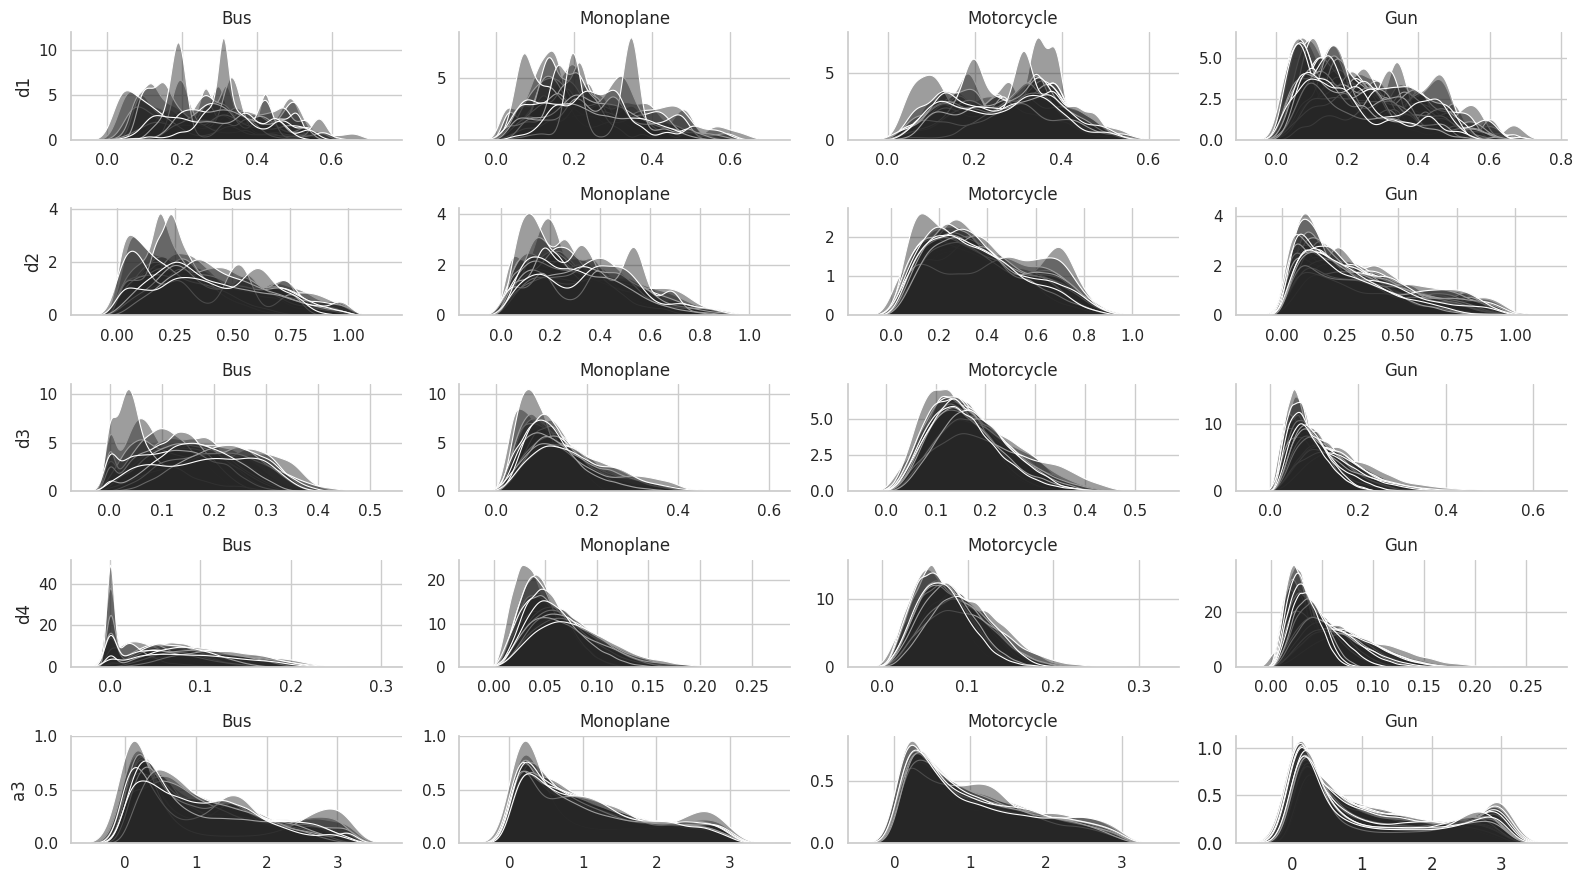

In [ ]:
classes = list(df_features["class_type"].unique())
for idx in range(0,len(classes)):
    fig, axes = plt.subplots(5,4, sharey=False, figsize=(16,9), sharex=False)
    subset_classes = classes[idx*4:(idx+1)*4]
    if len(subset_classes) < 4:
        subset_classes = classes[-4:]

    for row_axes, feature in zip(axes, ["d1", "d2", "d3", "d4", "a3"]):
        _ = kde_shape_prop_plot_combined(df_features, show_as_area=True, ax=row_axes[0], xlabel=feature, class_to_represent=subset_classes[0], feature_to_represent=f"{feature}_unbinned", show_plot=False, save_plot=False)
        _ = kde_shape_prop_plot_combined(df_features, show_as_area=True, ax=row_axes[1], xlabel=feature, class_to_represent=subset_classes[1], feature_to_represent=f"{feature}_unbinned", show_plot=False, save_plot=False)
        _ = kde_shape_prop_plot_combined(df_features, show_as_area=True, ax=row_axes[2], xlabel=feature, class_to_represent=subset_classes[2], feature_to_represent=f"{feature}_unbinned", show_plot=False, save_plot=False)
        _ = kde_shape_prop_plot_combined(df_features, show_as_area=True, ax=row_axes[3], xlabel=feature, class_to_represent=subset_classes[3], feature_to_represent=f"{feature}_unbinned", show_plot=False, save_plot=False)
        [ax.set_ylabel("") for ax in row_axes[1:]]
    plt.tight_layout()
    plt.savefig(f"Plots/multiple_plot_hist_features_{''.join(subset_classes)}.png", transparent=True, bbox_inches="tight")
    # plt.show()

In [ ]:
kde_shape_prop_plot_combined(df_features, show_as_area=True, xlabel="a3", class_to_represent="House", feature_to_represent="a3_unbinned")

In [ ]:
kde_shape_prop_plot_combined(df_features, show_as_area=True, xlabel="a3", class_to_represent="Monoplane", feature_to_represent="a3_unbinned")

In [ ]:
kde_shape_prop_plot_combined(df_features, show_as_area=True, xlabel="a3", class_to_represent="Cup", feature_to_represent="a3_unbinned")

In [ ]:
kde_shape_prop_plot_combined(df_features, show_as_area=True, xlabel="a3", class_to_represent="Quadruped", feature_to_represent="a3_unbinned")

In [53]:
# arr = np.asarray(df_features[df_features["class_type"] == "Quadruped"]["a3_unbinned"].tolist())
# kde_shape_prop_plot(array_prop=arr, show_as_area=True, xlabel="a3")